<a href="https://colab.research.google.com/github/pmontecinos23/Spanish-Wine-Evaluation/blob/main/Spanish_Wine_Evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spanish Wine Evaluation
Author: Paul Montecinos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [2]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

## Regression Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Loading Wine Data

### Data Source: 
https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download

In [3]:
wine = pd.read_csv('/content/drive/MyDrive/Stack 2 Machine Learning/03 Week 3: Classification Models/Project 2/wines_SPA.csv')
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Brief Description: with 7500 different wines we can use this data to determining ratings and popularity of spanish wines

Target: Rating

Row represent: Wines

Classification or Regression: As an avid wine drinker, I would do a classification model determining the highest rated wines.

Features: There are 11 features in this dataset

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
# How many rows
print(f'Number of rows:{len(wine.axes[0])}')

Number of rows:7500


In [6]:
wine.shape
print(f'There are {wine.shape[0]} rows, and {wine.shape[1]} columns.')
print(f'The rows represent {wine.shape[0]} observations, and the columns represent {wine.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


## Data Cleaning

In [7]:
## make columns lowercase for ease of reference and display names
wine.columns = wine.columns.str.lower()
wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

### Checking for Duplicates & Removing Duplicates

In [8]:
# checking for duplicates
wine.duplicated().sum()

5452

In [9]:
wine = wine.drop_duplicates()
wine.duplicated().sum()

0

In [10]:
wine.describe(exclude='number')

,winery,wine,year,country,region,type
count,2048,2048,2046,2048,2048,1942
unique,480,847,71,1,76,21
top,Vega Sicilia,Tinto,2016,Espana,Ribera del Duero,Ribera Del Duero Red
freq,97,56,243,2048,541,535


In [11]:
## With only 1 country in the data set I am dropping it
wine = wine.drop(columns='country')

In [12]:
# checking breadown of numeric columns
wine.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [13]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(wine)
for col in cat_cols:
  display(wine[col].value_counts(normalize=True))

Vega Sicilia                            0.047363
Alvaro Palacios                         0.023438
Artadi                                  0.020996
La Rioja Alta                           0.017578
Marques de Murrieta                     0.016113
                                          ...   
Valdelosfrailes                         0.000488
Briego                                  0.000488
Guillem Carol - Cellers Carol Valles    0.000488
Particular                              0.000488
Binigrau                                0.000488
Name: winery, Length: 480, dtype: float64

Tinto                                                 0.027344
Unico                                                 0.020020
Valbuena 5o                                           0.015625
Reserva                                               0.015137
Priorat                                               0.012695
                                                        ...   
San Valentin Parellada                                0.000488
Silvanus Edicion Limitada Ribera del Duero            0.000488
El Jardin de las Iguales Vinedo Historico Garnacha    0.000488
Garnacha Vinas Centenarias                            0.000488
Capricho Crianza                                      0.000488
Name: wine, Length: 847, dtype: float64

2016    0.118768
2017    0.117302
2015    0.100684
2018    0.095797
2014    0.077224
          ...   
1953    0.000489
1972    0.000489
1974    0.000489
1931    0.000489
1925    0.000489
Name: year, Length: 71, dtype: float64

Ribera del Duero                   0.264160
Rioja                              0.233887
Priorato                           0.122070
Toro                               0.040039
Castilla y Leon                    0.024902
                                     ...   
Ribera del Gallego-Cinco Villas    0.000488
Monterrei                          0.000488
Jerez Cream                        0.000488
Condado de Huelva                  0.000488
Abona                              0.000488
Name: region, Length: 76, dtype: float64

Ribera Del Duero Red    0.275489
Rioja Red               0.232235
Priorat Red             0.122554
Red                     0.108136
Toro Red                0.040165
Tempranillo             0.037590
Sherry                  0.028836
Rioja White             0.019053
Pedro Ximenez           0.018023
Grenache                0.018023
Albarino                0.017508
Cava                    0.016993
Verdejo                 0.013903
Monastrell              0.009269
Mencia                  0.008754
Montsant Red            0.008754
Syrah                   0.007724
Chardonnay              0.006694
Cabernet Sauvignon      0.005664
Sparkling               0.002575
Sauvignon Blanc         0.002060
Name: type, dtype: float64

In [14]:
# after reviewing data I saw most wines that were missing where white wines
wine['type'].fillna('White', inplace = True)

# Creating a 2nd DataFrame for graphing.

In [15]:
# Dropping columns 
wine1 = wine.drop(columns=['wine', 'year', 'winery','region'])
wine1.head()

,rating,num_reviews,price,type,body,acidity
0,4.9,58,995.00,Toro Red,5.0,3.0
1,4.9,31,313.50,Tempranillo,4.0,2.0
2,4.8,1793,324.95,Ribera Del Duero Red,5.0,3.0
3,4.8,1705,692.96,Ribera Del Duero Red,5.0,3.0
4,4.8,1309,778.06,Ribera Del Duero Red,5.0,3.0


### Ratings histplot

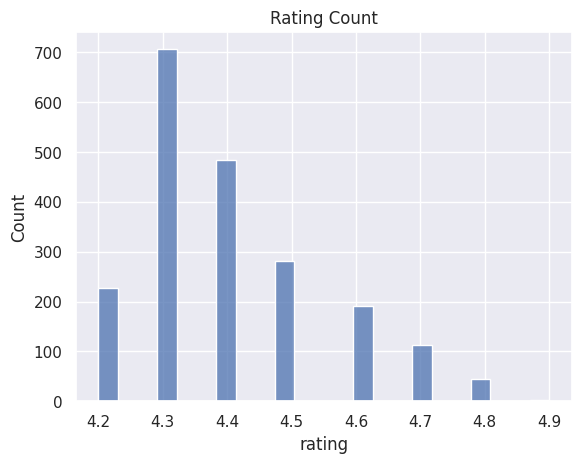

In [16]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="rating").set_title('Rating Count')
plt.show()

Wine ratings by count

706 wines have been rated 4.3. This represents most of the wines in the data set.

44 wines were rated 4.8 representing the 2nd least rating frquency.

### Price histplot

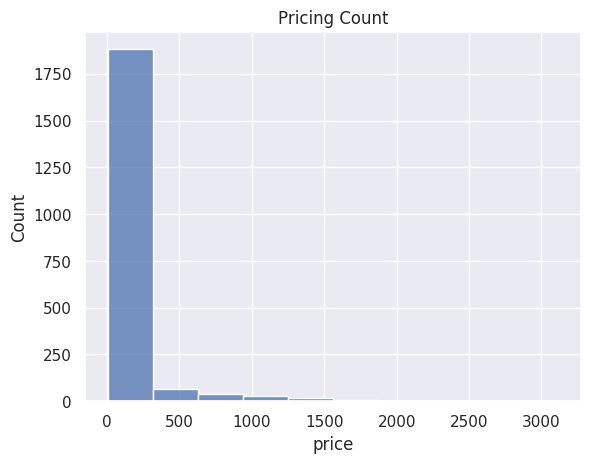

In [17]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="price", bins=10).set_title('Pricing Count')
plt.show()

### Body histplot

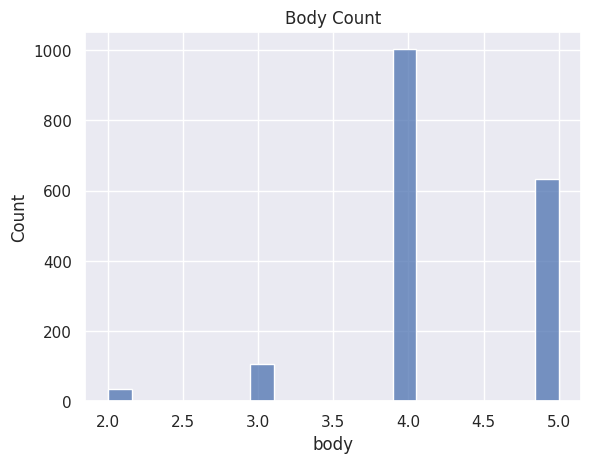

In [18]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="body").set_title('Body Count')
plt.show()

### Acidity histplot

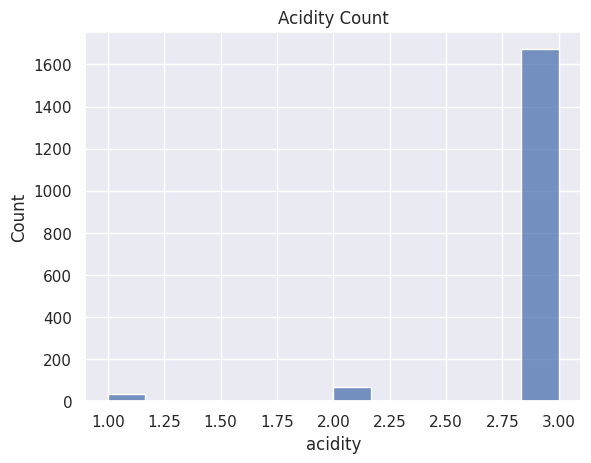

In [19]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="acidity").set_title('Acidity Count')
plt.show()

### Number of reviews histplot

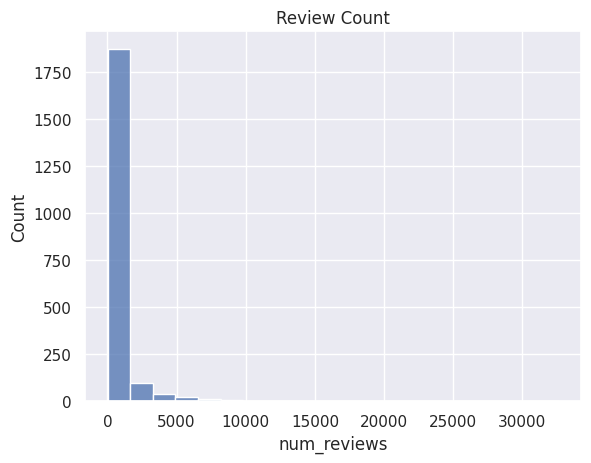

In [20]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="num_reviews",bins=20).set_title('Review Count')
plt.show()

## Categorical variable visuals

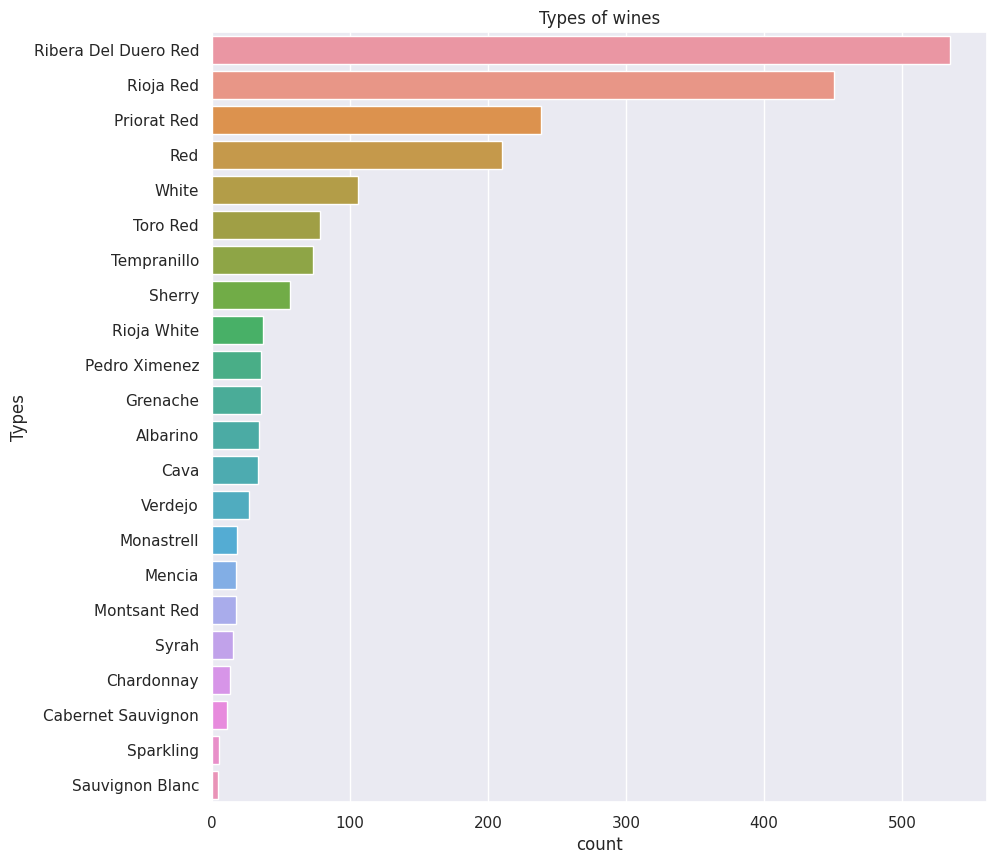

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(data = wine1, y = 'type', order = wine1['type'].value_counts().index)

ax.set(title = 'Types of wines')
ax.set(ylabel = 'Types');

You can see Using the Graph above the most common of wine type of the DataSet are Reds.

### Heatmap comparing numeric values

<ipython-input-22-5ecd65989221>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wine1.corr();


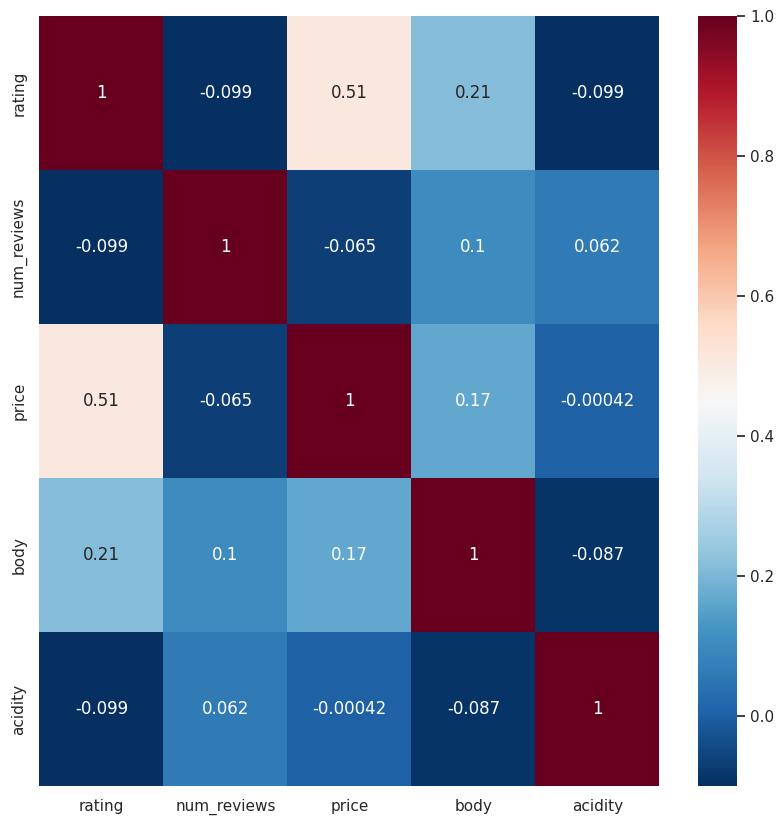

In [22]:
corr = wine1.corr();
sns.set(font_scale=1);
plt.figure(figsize=(10,10));
sns.heatmap(corr, cmap = 'RdBu_r', annot = True);

Using the heatmap above you can see there is a moderate correlation between the price and the rating. This usually means the better rated the wine is the more expensive. Thats not to say you cant find a hidden gem for cheaper.

### boxplot comparing body, rating, and acidity

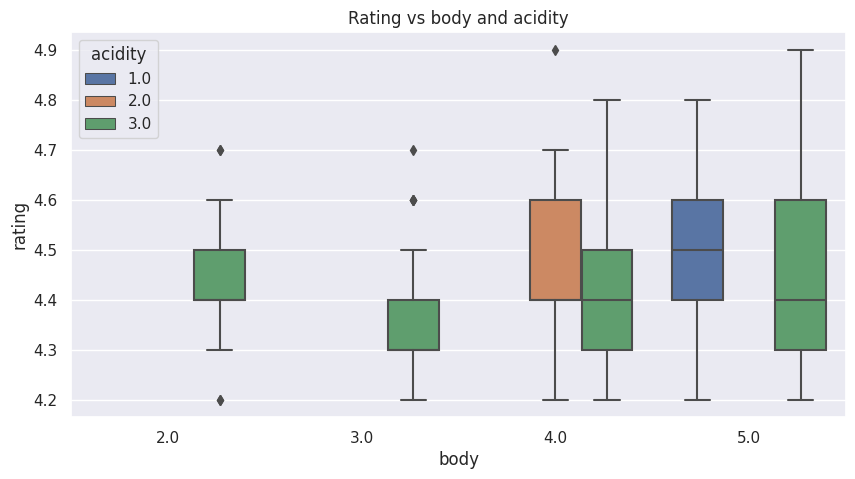

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data =wine1, x='body', y='rating', hue ='acidity')
plt.title('Rating vs body and acidity')
plt.show()

This boxplot shows the higher rated wines tend to have more body.

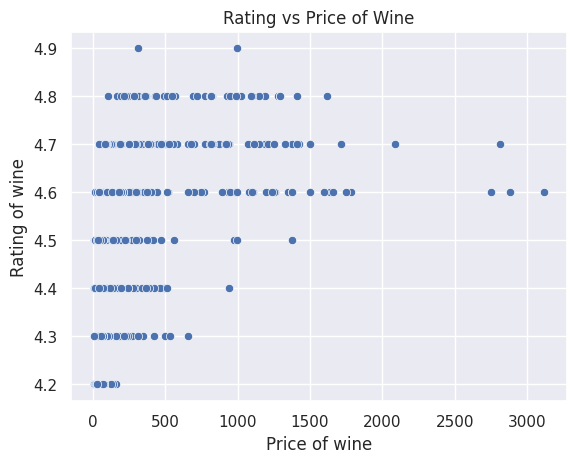

In [24]:
sns.set(font_scale=1)
sns.scatterplot(x='price', y='rating', 
    data=wine1).set(title='Rating vs Price of Wine')
plt.xlabel(
    'Price of wine')
plt.ylabel('Rating of wine');

With the scatter plot above you see of the 2 highest rated wines cost roughly 450.00 and 1000.00

You can also see the price of the wine does not alway correlate to higest ratings.

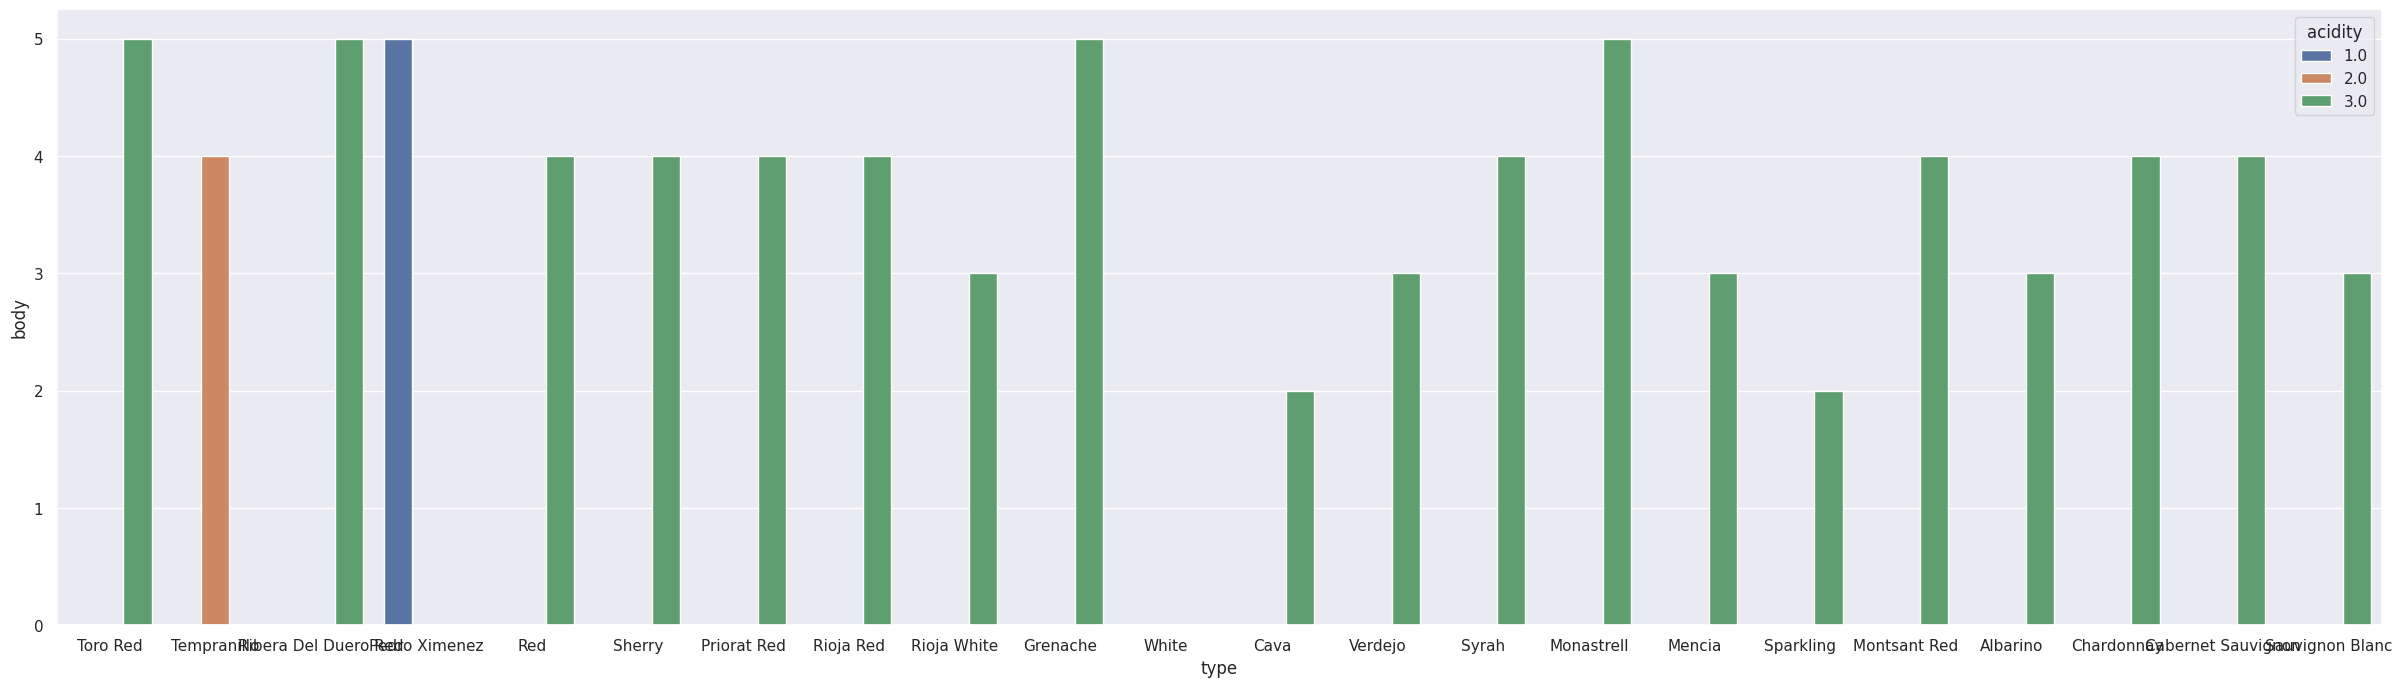

In [25]:
plt.figure(figsize=(30,8))
ax = sns.barplot(data = wine1, x = 'type', y = 'body', hue='acidity');

### Further engineering data for better visualizations

In [26]:
# Reducing wine types 
wine1['type'].replace({'Toro Red':'Red', 'Tempranillo': 'Red', 'Rioja Red':'Red',
                      'Ribera Del Duero Red':'Red', 'Priorat Red':'Red',
                      'Montsant Red':'Red', 'Monastrell':'Red','Mencia':'Red',
                      'Grenache':'Red', 'Cabernet Sauvignon':'Red',
                      'Syrah':'Red', 'Verdejo':'White', 'Sherry':'White',
                      'Sauvignon Blanc':'White', 'Rioja White':'White',
                      'Pedro Ximenez':'White','Chardonnay':'White',
                      'Albarino':'White', 'Cava':'Sparkling'}, inplace=True)



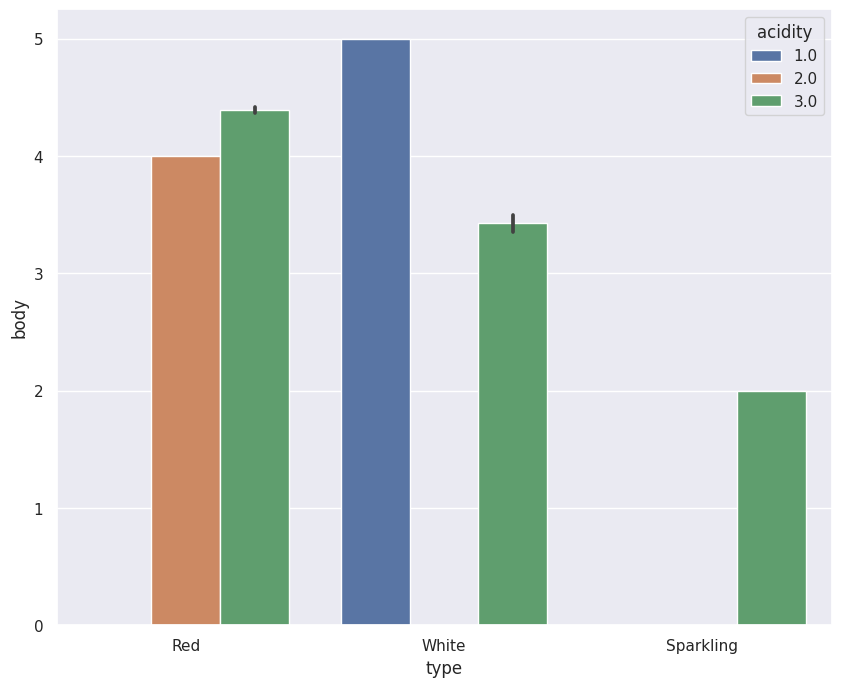

In [27]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data = wine1, x = 'type', y = 'body', hue='acidity');

The graph above details the body difference between the 3 wine types.

Reds are the only wine to have an acidity level of 2 and the whites are the only one to have a level of 1. 

Acidity is basically the tartness of a wine. When the levels are lower, they tend to be more refreshing. You can compare it to drinking a glass of lemonade. The lower the level the more refreshing it is, making you want to take another sip. 


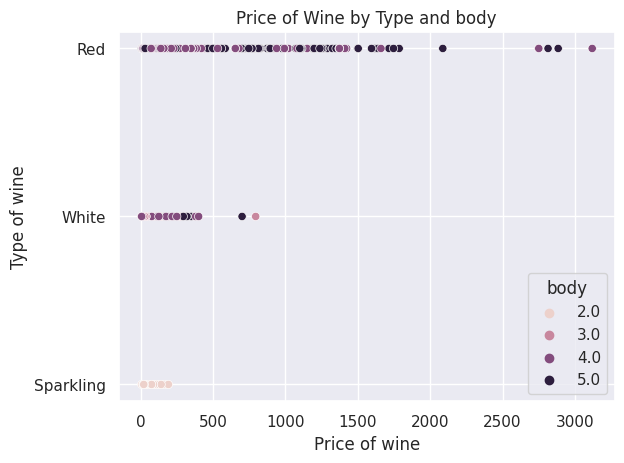

In [28]:
sns.set(font_scale=1);
sns.scatterplot(x='price', y='type', hue='body',
                data=wine1).set(title='Price of Wine by Type and body');
plt.xlabel(
    'Price of wine')
plt.ylabel('Type of wine');

The graph above shows the red wines have the largest amount of variance between the body of the wine.

The sparkling types have a very low level of body to them. This means the weight held on the palate is lighter compared to those with a heavier body.

# Cleaning up the original DataFrame:
Adding more visuals, then adding models

In [29]:
wine.describe(include='object')

,winery,wine,year,region,type
count,2048,2048,2046,2048,2048
unique,480,847,71,76,22
top,Vega Sicilia,Tinto,2016,Ribera del Duero,Ribera Del Duero Red
freq,97,56,243,541,535


In [30]:
wine.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [31]:
wine['rating'].replace({4.3:'Low', 4.2: 'Low', 4.4: 'Mid',
                      4.5: 'Mid', 4.6: 'High',4.7: 'High',
                      4.8: 'High', 4.9: 'High'}, inplace=True)

In [32]:
## Replace inconsistent value in year
wine['year'].replace('N.V.', '2010',inplace=True)
wine['year'].fillna('2010', inplace = True)
## Coverting 'object' to 'float' for year column
wine['year'] = wine['year'].astype(int)


In [33]:
# Rounding wine years to the nearest decade
wine['year'] = wine['year'].round(-1)
wine.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2010,High,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2020,High,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2010,High,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,2000,High,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,2000,High,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [34]:
values = [1950,1930, 1920, 1940, 1910]


wine = wine[wine.year.isin(values) == False]

In [58]:
# Convert year to categorical since the are not linear
#wine.loc[:, ('year')] = wine['year'].astype('object')
wine['wine'] = wine['year'].astype('object')

In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2035 non-null   object 
 1   wine         2035 non-null   object 
 2   year         2035 non-null   object 
 3   rating       2035 non-null   object 
 4   num_reviews  2035 non-null   int64  
 5   region       2035 non-null   object 
 6   price        2035 non-null   float64
 7   type         2035 non-null   object 
 8   body         1764 non-null   float64
 9   acidity      1764 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 174.9+ KB


The graph above details the body difference between the 3 wine types.

Reds are the only wine to have an acidity level of 2 and the whites are the only one to have a level of 1. 

Acidity is basically the tartness of a wine. When the levels are lower, they tend to be more refreshing. You can compare it to drinking a glass of lemonade. The lower the level the more refreshing it is, making you want to take another sip. 


Text(0, 0.5, 'Type of wine')

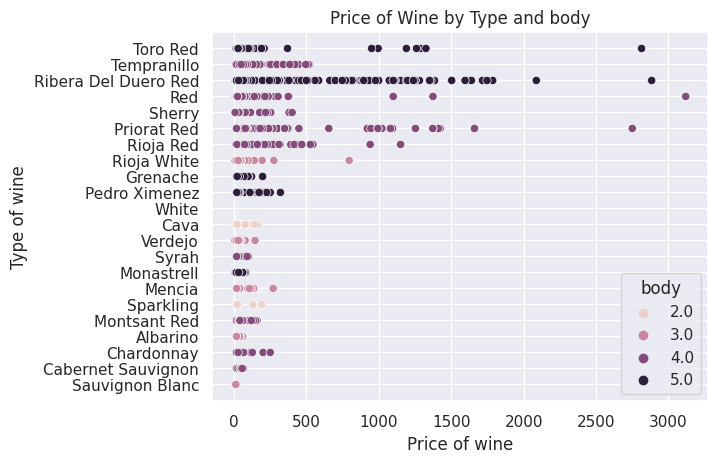

In [37]:
sns.set(font_scale=1)
sns.scatterplot(x='price', y='type', hue='body',
                data=wine).set(title='Price of Wine by Type and body')
plt.xlabel(
    'Price of wine')
plt.ylabel('Type of wine')

The graph above shows the red wines have the largest amount of variance between the body of the wine.

The sparkling types have a very low level of body to them. This means the weight held on the palate is lighter compared to those with a heavier body.

In [38]:
# Checking data
wine.describe(include='all')

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
count,2035,2035,2035.0,2035,2035.000000,2035,2035.000000,2035,1764.000000,1764.000000
unique,478,844,7.0,3,NaN,76,NaN,22,NaN,NaN
top,Vega Sicilia,Tinto,2020.0,Low,NaN,Ribera del Duero,NaN,Ribera Del Duero Red,NaN,NaN
freq,96,56,1039.0,933,NaN,540,NaN,534,NaN,NaN
mean,NaN,NaN,NaN,NaN,577.088452,NaN,133.425923,NaN,4.256236,2.928571
std,NaN,NaN,NaN,NaN,1379.976990,NaN,271.156935,NaN,0.653183,0.313254
min,NaN,NaN,NaN,NaN,25.000000,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,NaN,58.000000,NaN,31.775000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,NaN,142.000000,NaN,52.950000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,NaN,489.000000,NaN,107.535000,NaN,5.000000,3.000000


# Creating a function

In [39]:
def model_metrics(pipe, X_train, y_train, X_test, y_test,
                  model_name = 'Decision Tree Classifier',):
  train_pred = pipe.predict(X_train)
  test_pred = pipe.predict(X_test)

  metrics = ['train_accuracy', 'test_accuracy',
             'train_precision', 'test_precision',
             'train_recall', 'test_recall',
             'train_f1', 'test_f1']
  ## Train
  train_accuracy = accuracy_score(y_train, train_pred)
  train_precision = precision_score(y_train, train_pred)
  train_recall = recall_score(y_train, train_pred)
  train_f1 = f1_score(y_train, train_pred)

  ## Test
  test_accuracy = accuracy_score(y_test, test_pred)
  test_precision = precision_score(y_test, test_pred)
  test_recall = recall_score(y_test, test_pred)
  test_f1 = f1_score(y_test, test_pred)


  scores = pd.DataFrame(index=metrics, columns=[f'{model_name}_test'])
  scores.loc[metrics, f'{model_name}_test'] = [train_accuracy, test_accuracy,
                                               train_precision, test_precision,
                                               train_recall, test_recall,
                                               train_f1, test_f1]

  return scores    

## Train, Test, Split

In [40]:
# set features and targets
X = wine.drop(columns=['rating','region', 'winery', 'wine'])
y = wine['rating']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preprocessors

In [41]:
# Instantiate column selectors
## number & category selector
num_sel = make_column_selector(dtype_include= 'number' )
cat_sel = make_column_selector(dtype_include='object')

# Instantiate Mean Imputer
median_imp = SimpleImputer(strategy='median')

# Instantiate Transformers
## Scaler for numeric
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)

# Pipeline
num_pipe = make_pipeline(median_imp, scaler)

# Tuple for column transformer
num_tup = (num_pipe, num_sel)
cat_tup = (ohe, cat_sel)

# ColumnTransformer
preprocessor = make_column_transformer(num_tup, cat_tup, remainder='passthrough')

# fitting my X_train model
preprocessor.fit_transform(X_train)

array([[ 0.2536575 ,  0.04685805, -0.35989714, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3624812 , -0.08128493, -0.35989714, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2515901 ,  0.2156988 ,  1.26978545, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.32921387, -0.06661907, -0.35989714, ...,  0.        ,
         0.        ,  0.        ],
       [-0.32574853, -0.17881293, -0.35989714, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52058838, -0.36378613, -0.35989714, ...,  0.        ,
         0.        ,  0.        ]])

## Random Forest Regressor Model

In [43]:
# Create an instance of the model
rf = RandomForestClassifier()
# Create a model pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                ('randomforestclassifier', RandomForestClassifier())])

### Random forest predictions

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       254
         Low       1.00      1.00      1.00       701
         Mid       1.00      1.00      1.00       571

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526



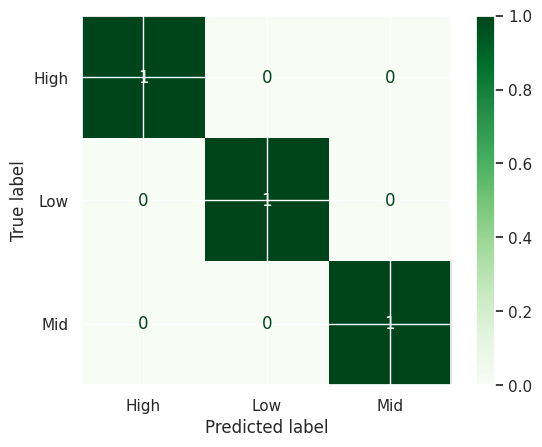

In [44]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
rf_preds = rf_pipe.predict(X_train)

print(classification_report(y_train, rf_preds))

ConfusionMatrixDisplay.from_predictions(y_train, rf_preds,
                                        cmap='Greens',
                                        normalize='true');

Model is predicting perfectly. This may be due to the small amount of data in the data set. I do not beleive I am currently overfitting.

In [45]:
# Params for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'columntransformer': ColumnTr

### RF using GrisSearch

In [46]:
# Tune rf with GridSearchCV
rf_param_grid = {'randomforestclassifier__max_features': [2,3,5,7,9],
                 'randomforestclassifier__max_depth': [2,3,5,7,9]}

# GridSearch using pipeline and param grid
rf_gs = GridSearchCV(rf_pipe, rf_param_grid)

# fitting GSCV
rf_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(rf_gs.best_params_)

# print accuracy using .best_estimator
rf_best = rf_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {rf_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 5}
Accuracy of Random Forest Model: 0.5795677799607073


## Tuned RF w/ GridSearch

In [59]:
# Tuned RF with GS
rf_tuned = RandomForestClassifier(max_features=5, max_depth=9, random_state=42)
# Pipeline for model
rf_gs_pipe = make_pipeline(preprocessor, rf_tuned)
# Fit model
rf_gs_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=9, max_features=5,
                                        random_state=42))])

              precision    recall  f1-score   support

        High       0.94      0.66      0.77       254
         Low       0.80      0.88      0.84       701
         Mid       0.73      0.73      0.73       571

    accuracy                           0.79      1526
   macro avg       0.82      0.76      0.78      1526
weighted avg       0.80      0.79      0.79      1526



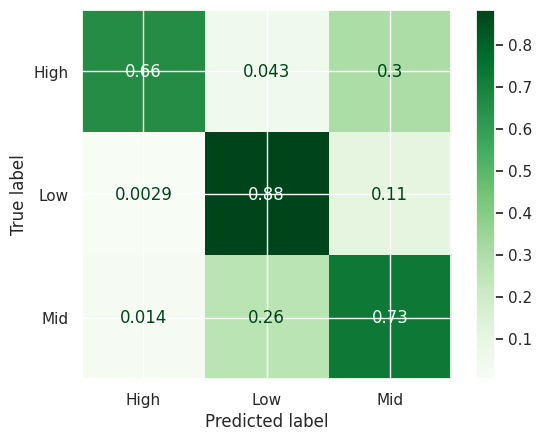

In [60]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
rf_gs_pred = rf_gs_pipe.predict(X_train)

print(classification_report(y_train, rf_gs_pred))

ConfusionMatrixDisplay.from_predictions(y_train, rf_gs_pred,
                                        cmap='Greens',
                                        normalize='true');

The model able is currently at a 79 percent accuracy. Lows are predicting 88 percent.

## RF with PCA

In [49]:
# Setting PCA at 7
pca = PCA(n_components=7)
# Pipeline for preprocessor and PCA
transformer = make_pipeline(preprocessor, pca)
# RF model
rf_pca = RandomForestClassifier(random_state = 42)
# RF model with PCA
rf_pcs = make_pipeline(transformer, rf_pca)
# Fitting Model
rf_pcs.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                                 ('pca', PCA(n_components=7))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       254
         Low       1.00      1.00      1.00       701
         Mid       1.00      1.00      1.00       571

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526



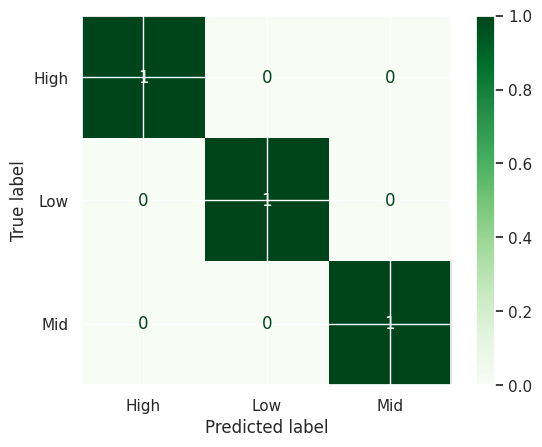

In [61]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
rf_pred = rf_pcs.predict(X_train)

print(classification_report(y_train, rf_pred))

ConfusionMatrixDisplay.from_predictions(y_train, rf_pred,
                                        cmap='Greens',
                                        normalize='true');

Again my model is displaying 100 percent accuracy.

In [50]:
# Model
knn = KNeighborsClassifier()
# Pipeline for preprocessor and model
knn_pipe = make_pipeline(preprocessor, knn)
# Fitting pipeline
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

        High       0.70      0.69      0.69       254
         Low       0.74      0.80      0.77       701
         Mid       0.70      0.62      0.66       571

    accuracy                           0.72      1526
   macro avg       0.71      0.71      0.71      1526
weighted avg       0.72      0.72      0.72      1526



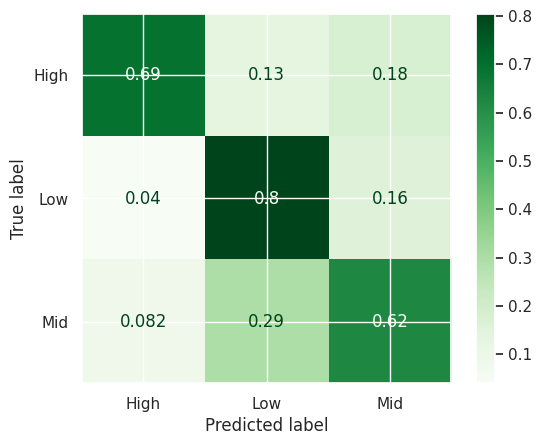

In [51]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
knn_preds = knn_pipe.predict(X_train)

print(classification_report(y_train, knn_preds))

ConfusionMatrixDisplay.from_predictions(y_train, knn_preds,
                                        cmap='Greens',
                                        normalize='true');

In [52]:
# Looking at options for tuning this model
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransf

### KNN tuning with GridSearch

In [53]:
# Tune DT with GridSearchCV
knn_param_grid = {'kneighborsclassifier__n_neighbors': [2,3,5]}

# GridSearch using pipeline and param grid
knn_gs = GridSearchCV(knn_pipe, knn_param_grid)

# fitting GSCV
knn_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(knn_gs.best_params_)

# print accuracy using .best_estimator
dt_best = knn_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {rf_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'kneighborsclassifier__n_neighbors': 5}
Accuracy of Random Forest Model: 0.5795677799607073


## KNN with GSCV

In [54]:
# Knn w/5 GS
knn_gs_t = KNeighborsClassifier(n_neighbors= 5)
# KNN pipeline with preprocessor and KNN/GS
knn_gs_pipe = make_pipeline(preprocessor, knn_gs_t)
# Fit Model
knn_gs_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

        High       0.70      0.69      0.69       254
         Low       0.74      0.80      0.77       701
         Mid       0.70      0.62      0.66       571

    accuracy                           0.72      1526
   macro avg       0.71      0.71      0.71      1526
weighted avg       0.72      0.72      0.72      1526



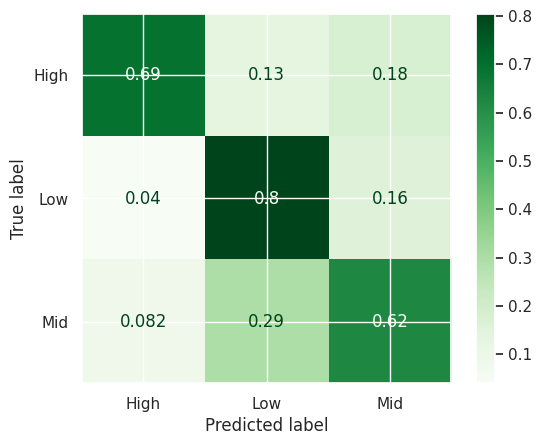

In [55]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
knngs_pred = knn_gs_pipe.predict(X_train)

print(classification_report(y_train, knngs_pred))

ConfusionMatrixDisplay.from_predictions(y_train, knngs_pred,
                                        cmap='Greens',
                                        normalize='true');

## KNN with PCA

In [56]:
# Setting PCA at 7
pca = PCA(n_components=7)
# Pipeline for preprocessor and PCA
transformer = make_pipeline(preprocessor, pca)
# KNN model
knn_pca = KNeighborsClassifier()
# KNN model with PCA
knn_pcs = make_pipeline(transformer, knn_pca)
# Fit model
knn_pcs.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867531670>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fe867830670>)])),
                                 ('pca', PCA(n_components=7))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

        High       0.69      0.70      0.69       254
         Low       0.74      0.80      0.77       701
         Mid       0.69      0.62      0.65       571

    accuracy                           0.72      1526
   macro avg       0.71      0.71      0.71      1526
weighted avg       0.71      0.72      0.71      1526



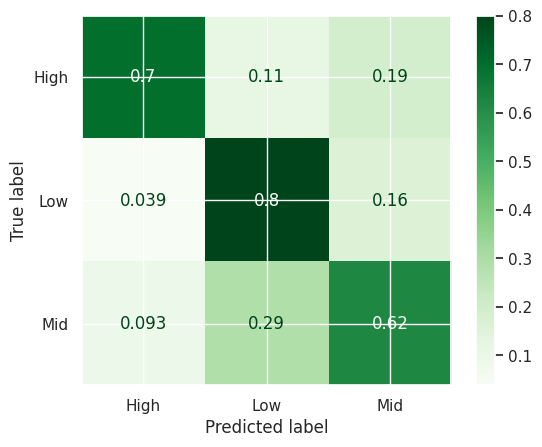

In [57]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
knn_pred = knn_pcs.predict(X_train)

print(classification_report(y_train, knn_pred))

ConfusionMatrixDisplay.from_predictions(y_train, knn_pred,
                                        cmap='Greens',
                                        normalize='true');

The best KNN model was using PCA with a testing accuracy of 72 percent. My false positives are anywhere from 1 to 29 percent. Knowing this I would present my Random Forest Model

## Summary

I would choose the random forest model. This model has a perfect prediction rate in categorizing wines by rating to the consumers. We know that higher ratings in body and acidity will result in higher ratings and higher prices. We can also market our lower rated wines as everyday wines. These would fall under the daily drinking wines since they are lower in price.

Using the ratings of wines, we can market certain wines in certain seasons. For instance, sparkling wines tend to have more acidity which usually means more drinkability during summer months since they then become more refreshing. Wines with higher bodies tend to be reds which have more viscosity would typically be better during colder weather. 
